In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
pd.set_option("display.max_columns",20)
pd.options.display.float_format = "{:.2f}".format

In [3]:
df=pd.read_csv('movies.csv')

In [4]:
#data cleaning
df2=df.copy()

In [5]:
y = df2['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})


In [6]:
df2.insert(4,'released_date',y['released_date'])
df2.insert(5,'released place',y['released_place'])

In [7]:
df2.drop(columns='released')

,name,rating,genre,year,released_date,released place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",United States,8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",United States,5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",United States,8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980",United States,7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980",United States,7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",United States,3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.00,NaN,NaN,90.00
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",United States,4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",Cameroon,5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.00,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",United States,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.00,NaN,NaN,120.00


In [8]:
df2.describe()

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5497.00,7479.00,7664.00
mean,2000.41,6.39,88108.50,35589876.19,78500541.02,107.26
std,11.15,0.97,163323.76,41457296.60,165725124.32,18.58
min,1980.00,1.90,7.00,3000.00,309.00,55.00
25%,1991.00,5.80,9100.00,10000000.00,4532055.50,95.00
50%,2000.00,6.50,33000.00,20500000.00,20205757.00,104.00
75%,2010.00,7.10,93000.00,45000000.00,76016691.50,116.00
max,2020.00,9.30,2400000.00,356000000.00,2847246203.00,366.00


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7668 non-null   object 
 1   rating          7591 non-null   object 
 2   genre           7668 non-null   object 
 3   year            7668 non-null   int64  
 4   released_date   7666 non-null   object 
 5   released place  7666 non-null   object 
 6   released        7666 non-null   object 
 7   score           7665 non-null   float64
 8   votes           7665 non-null   float64
 9   director        7668 non-null   object 
 10  writer          7665 non-null   object 
 11  star            7667 non-null   object 
 12  country         7665 non-null   object 
 13  budget          5497 non-null   float64
 14  gross           7479 non-null   float64
 15  company         7651 non-null   object 
 16  runtime         7664 non-null   float64
dtypes: float64(5), int64(1), object(1

In [10]:
df2['released_date']= df2['released_date'].astype(str).astype('datetime64')

In [11]:
df2.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'columns',0:'Null_Values'})
#There are so many NA values to drop and analyze

,columns,Null_Values
0,budget,2171
1,gross,189
2,rating,77
3,company,17
4,runtime,4
5,country,3
6,writer,3
7,votes,3
8,score,3
9,released,2


In [12]:
#FillNA
columns_1 = ['rating','company','writer','country','released place','star']
for i in columns_1:
    df2[i].fillna("Others",inplace=True)

columns_2 = ['runtime','score','votes']
for j in columns_2:
    df2[j].fillna(0,inplace=True) 
columns_3 = ['budget','gross']
for k in columns_3:
    df2[k].fillna(round(np.mean(df2[k])),inplace=True)

In [13]:
df2['released_date'].fillna('0000-00-00',inplace=True)

In [14]:
df2.to_csv("Movie_industry.csv")

Text(0.5, 1.0, 'Top 5 Highest Grossing Movies')

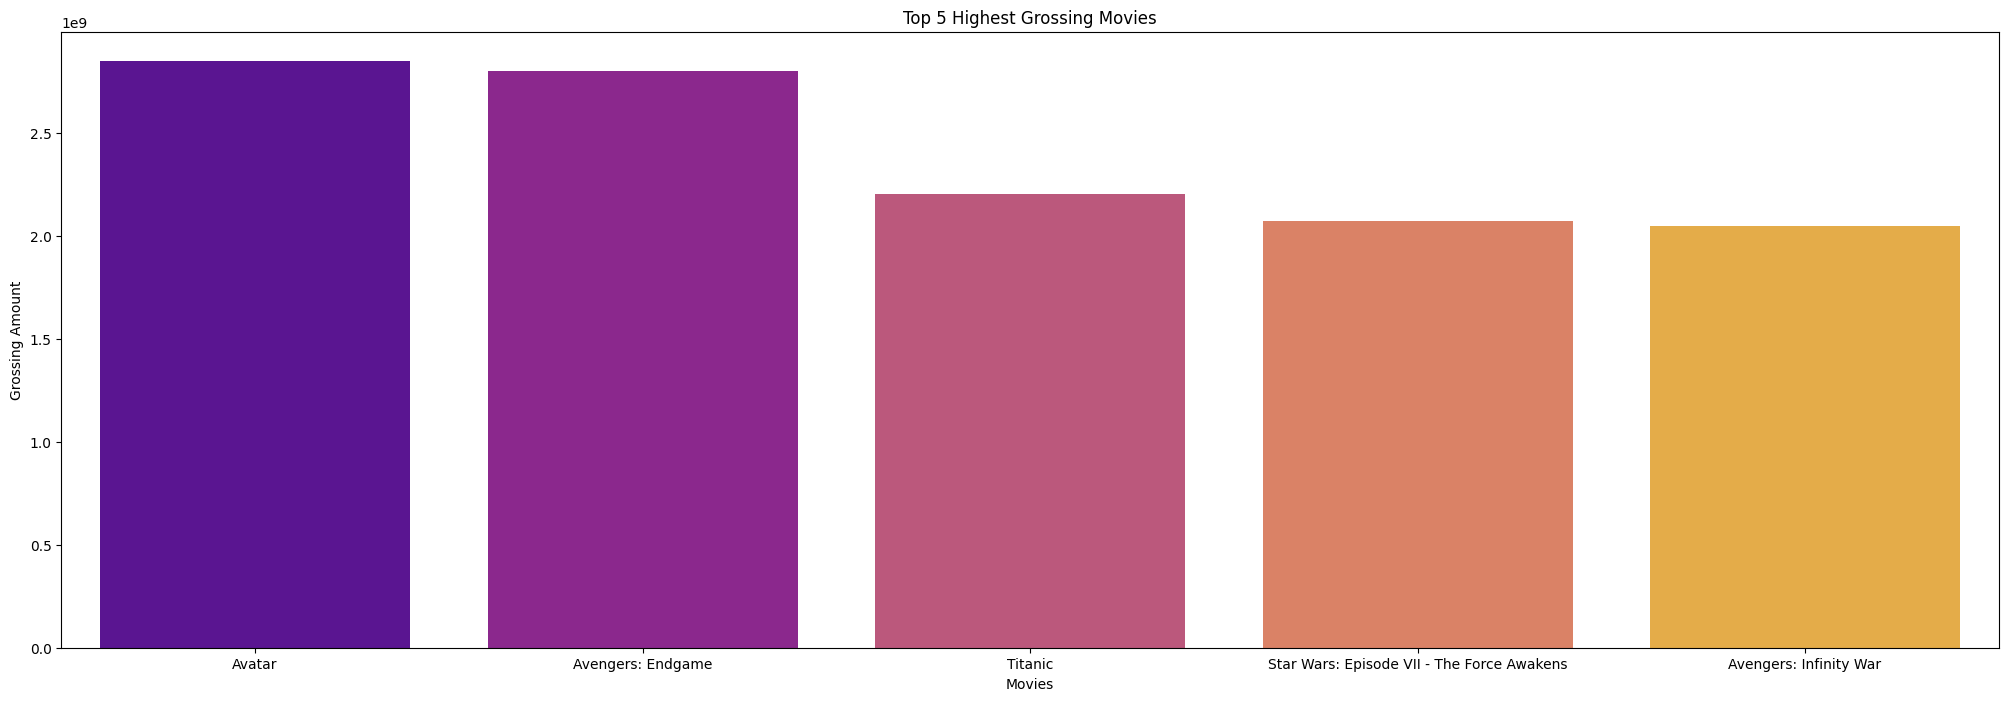

In [15]:
plt.figure(figsize=(25,8))
sns.barplot(x='name',y='gross',data=df2.sort_values(by='gross',ascending=False).head(),palette='plasma')
plt.xlabel('Movies')
plt.ylabel('Grossing Amount')
plt.title('Top 5 Highest Grossing Movies')

Text(0.5, 1.0, 'Top 5 Highest Budget Movies')

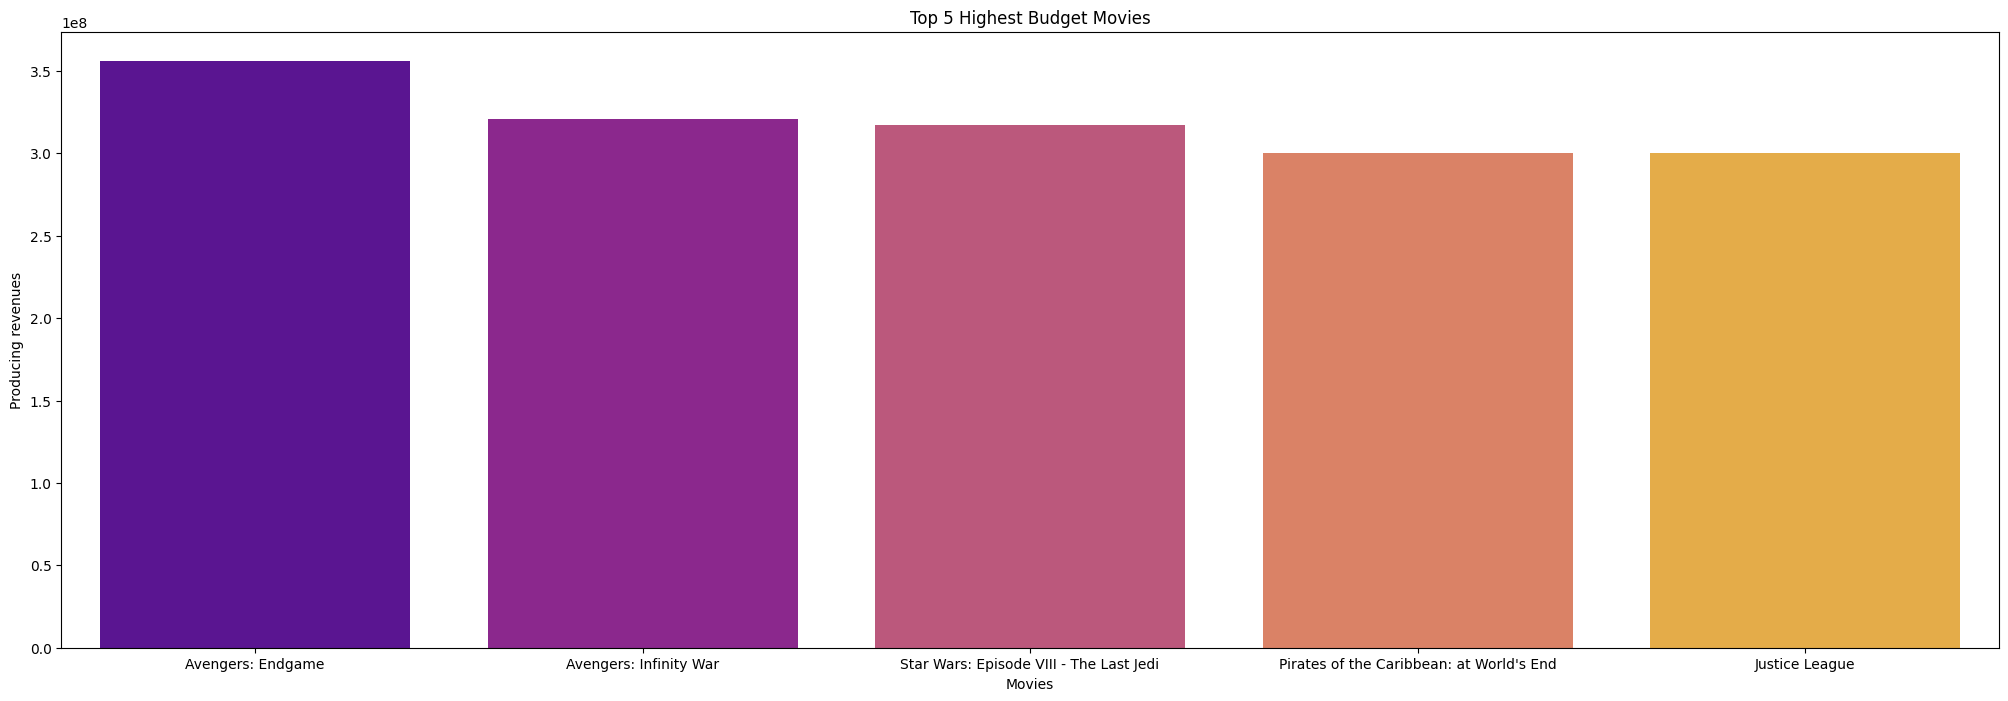

In [16]:
plt.figure(figsize=(25,8))
sns.barplot(x='name',y='budget',data=df2.sort_values(by='budget',ascending=False).head(),palette='plasma')
plt.xlabel('Movies')
plt.ylabel('Producing revenues')
plt.title('Top 5 Highest Budget Movies')

Text(0.5, 1.0, 'The Most Popular Genres Of Movies')

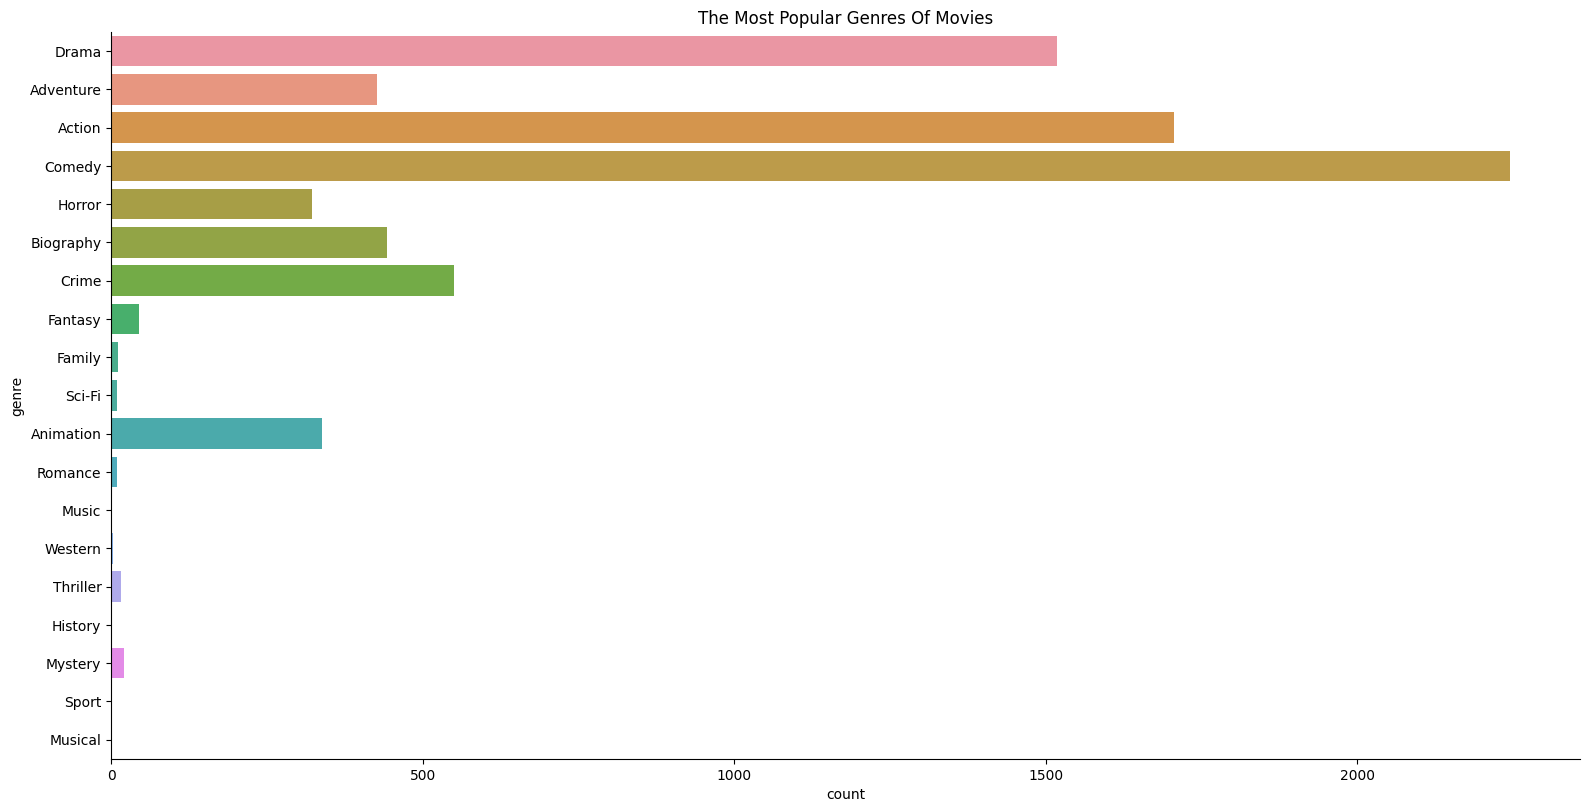

In [17]:
sns.catplot(y='genre', kind='count', data=df2,height=8, aspect=2)
plt.title('The Most Popular Genres Of Movies')

Comedy is the most popular genre but none of these films are in top 5 highest grossing movies.Therefore it is true that comedies hardly attract audiences compared with action counterparts(4 of these are in top 5)

Text(0.5, 1.0, 'Average Budget Of Each Genre')

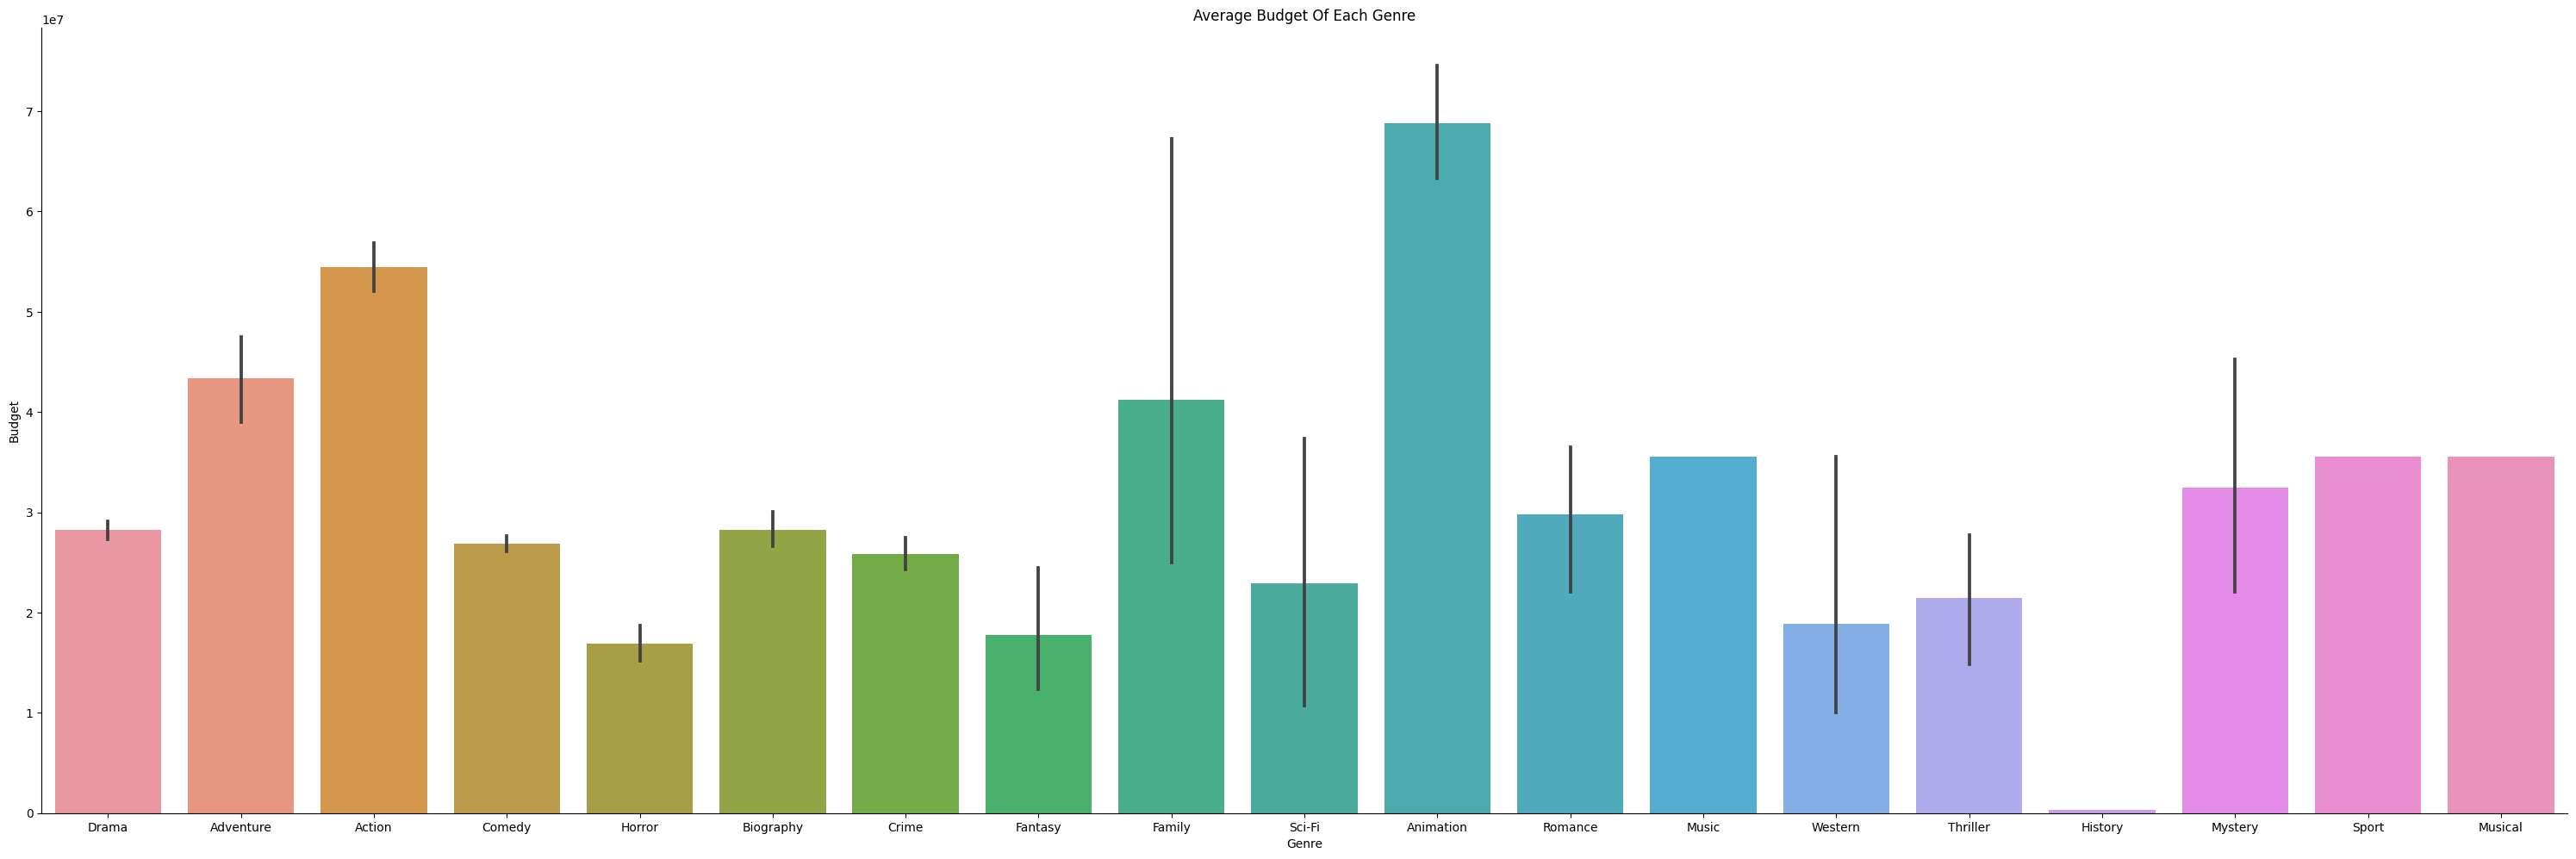

In [19]:
sns.catplot(x='genre',y='budget',kind='bar', data=df2,height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget Of Each Genre')

However producing action films costs dominantly expensive budget compared to comedies --> It is risky when investing in this type of movie 

Animation, action, and adventure movies require more budget because they involve a lot of special effects, detailed sets, and stunt work. Animation also typically requires more time and resources to create. Additionally, these types of movies often require higher-than-average salaries for actors and stunt people. All of these things cost money, which is why these types of movies often require a larger budget to be successful.

Text(0.5, 1.0, 'Average Gross Of Each Genre')

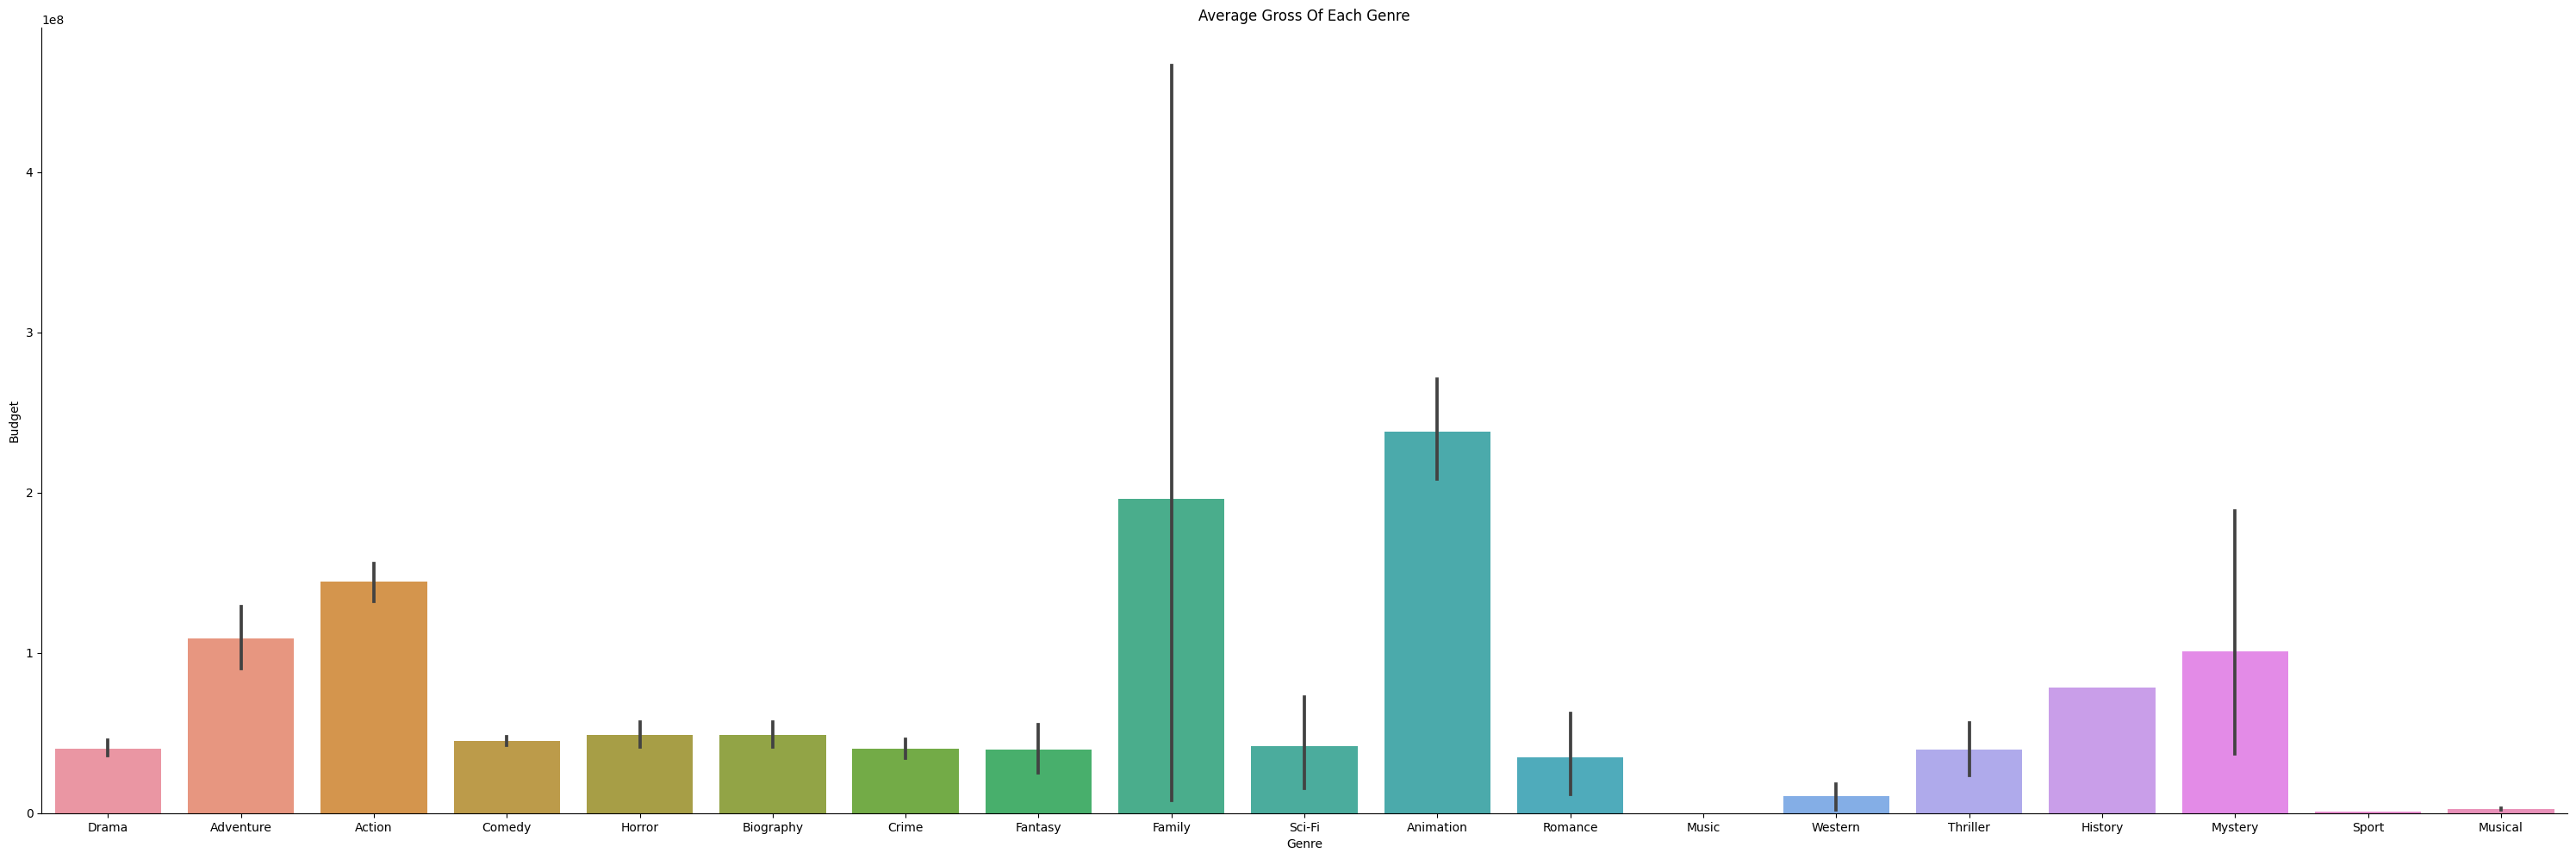

In [22]:
sns.catplot(x='genre',y='gross',kind='bar', data=df2,height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Gross Of Each Genre')

looking at the graph it is true that comedie'gross is stable --> it explains why this type of film attracts many company

Animation is also a ideal genre for companies to invest in (but it requires a relatively large amount of money)

By contrast family shows' gross earnings fluctuate significantly --> extremely risky to invest

Animation, family, action and adventure movies are gaining more gross compare with other genres because these genres tend to draw a wide range of audiences. Animation, family and action movies have the potential to appeal to both children and adults, while adventure movies offer an exciting and thrilling experience. These genres have a wide range of topics and stories that audiences can relate to, which makes them more attractive to viewers. Additionally, animation, family and action movies typically feature well-known actors, which further draws in audiences.

In [27]:
data= df2.groupby('year')['gross'].sum().reset_index().sort_values(by='year',ascending=False).rename(columns={'gross':'Total box office return'})
data[1:6]

,year,Total box office return
39,2019,30653655205.00
38,2018,28085289459.00
37,2017,28485248415.00
36,2016,28938844792.00
35,2015,26824511629.00


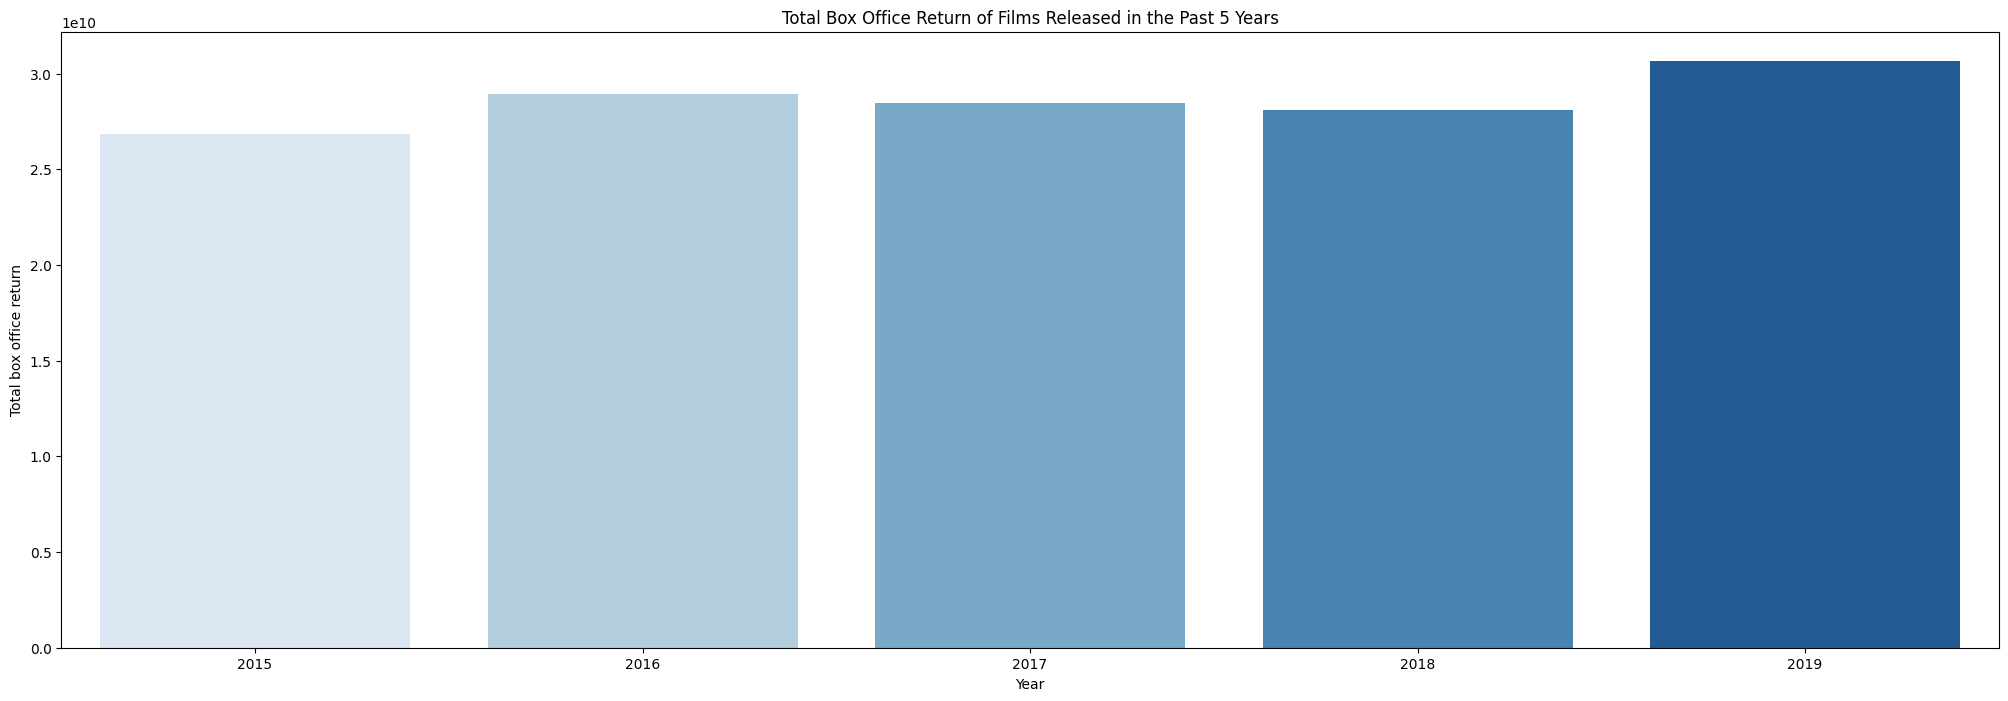

In [28]:
plt.figure(figsize=(25,8))
sns.barplot(data=data[1:6],y='Total box office return',x='year',palette='Blues')
plt.xlabel('Year')
plt.title('Total Box Office Return of Films Released in the Past 5 Years')
plt.show()

 Maybe it is a rise in filming industry until 2022 :)) 

In [30]:
df2['profit']=df2['gross']-df2['budget']

In [31]:
df2.head()

,name,rating,genre,year,released_date,released place,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,The Shining,R,Drama,1980,1980-06-13 00:00:00,United States,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,27998772.00
1,The Blue Lagoon,R,Adventure,1980,1980-07-02 00:00:00,United States,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,54353106.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20 00:00:00,United States,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,520375067.00
3,Airplane!,PG,Comedy,1980,1980-07-02 00:00:00,United States,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,79953539.00
4,Caddyshack,R,Comedy,1980,1980-07-25 00:00:00,United States,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,33846344.00


In [32]:
data1= df2.groupby('year')['profit'].sum().reset_index().sort_values(by='year',ascending=False).rename(columns={'year':'Years','profit':'Profit'})[1:10]
data1

,Years,Profit
39,2019,21005555621.00
38,2018,19043686527.00
37,2017,18691026723.00
36,2016,18693159876.00
35,2015,17965020813.00
34,2014,17720357151.00
33,2013,16506173510.00
32,2012,16382069703.00
31,2011,15623862337.00


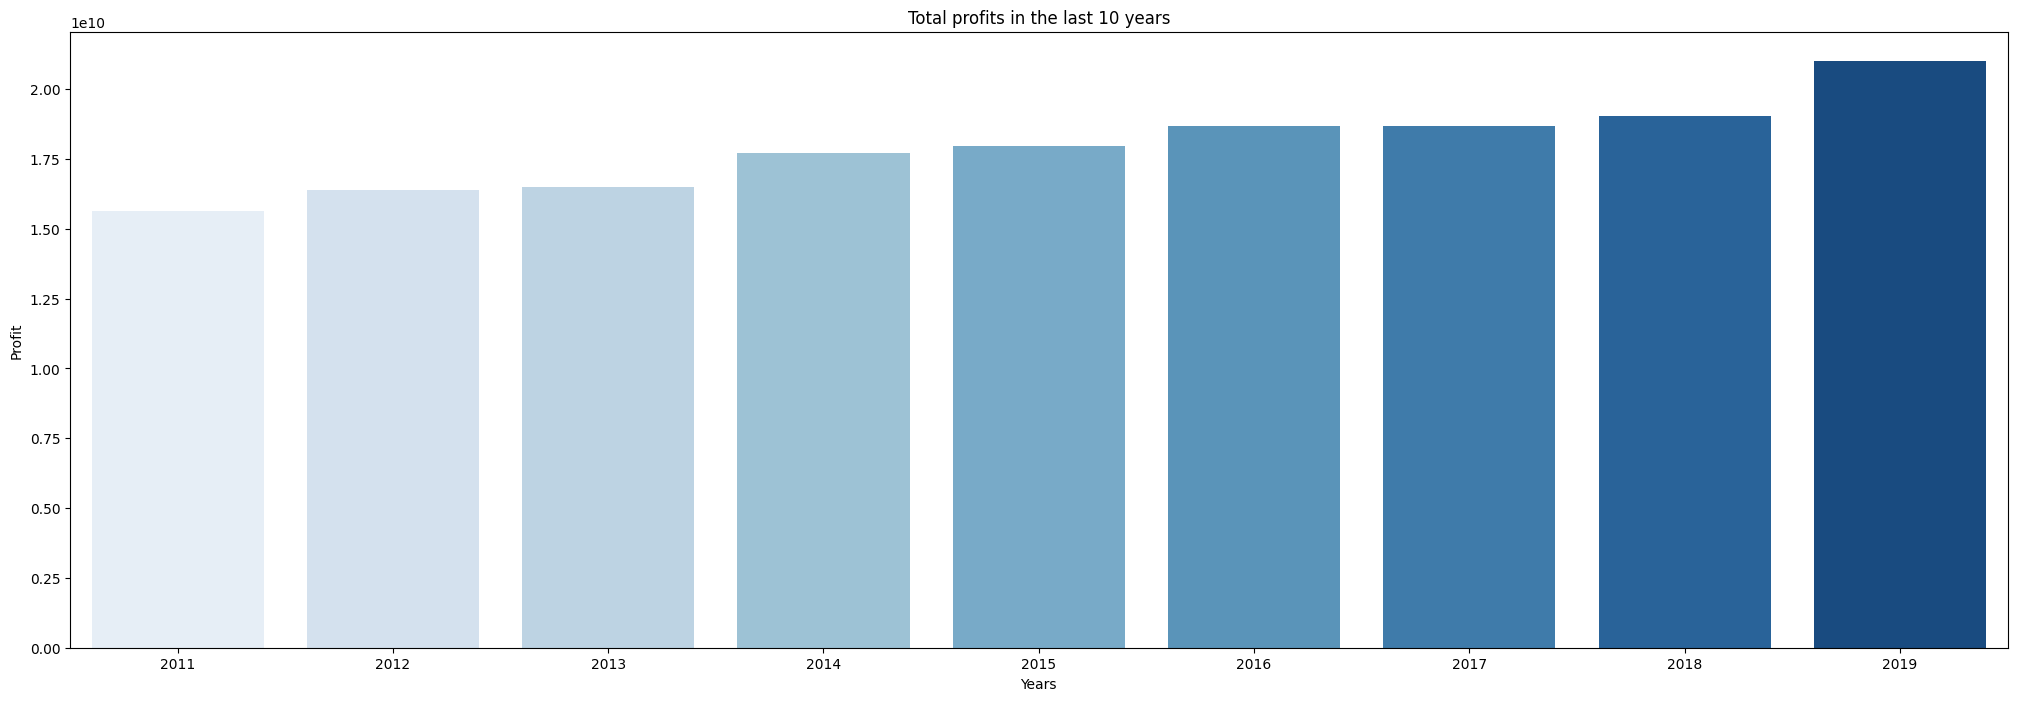

In [33]:
plt.figure(figsize=(25,8))
sns.barplot(data=data1,y='Profit',x='Years',palette='Blues')
plt.title('Total profits in the last 10 years')
plt.show()

The growth of the movie industry in the past 10 years can be attributed to a combination of factors:
    1 The proliferation of streaming services 
    2 The advancement of technologies and cinematography,etc
    3 Movie studios have invested in more creative and innovative storytelling methods
    

Text(0.5, 1.0, 'Top 10 Highest Viewership Movies')

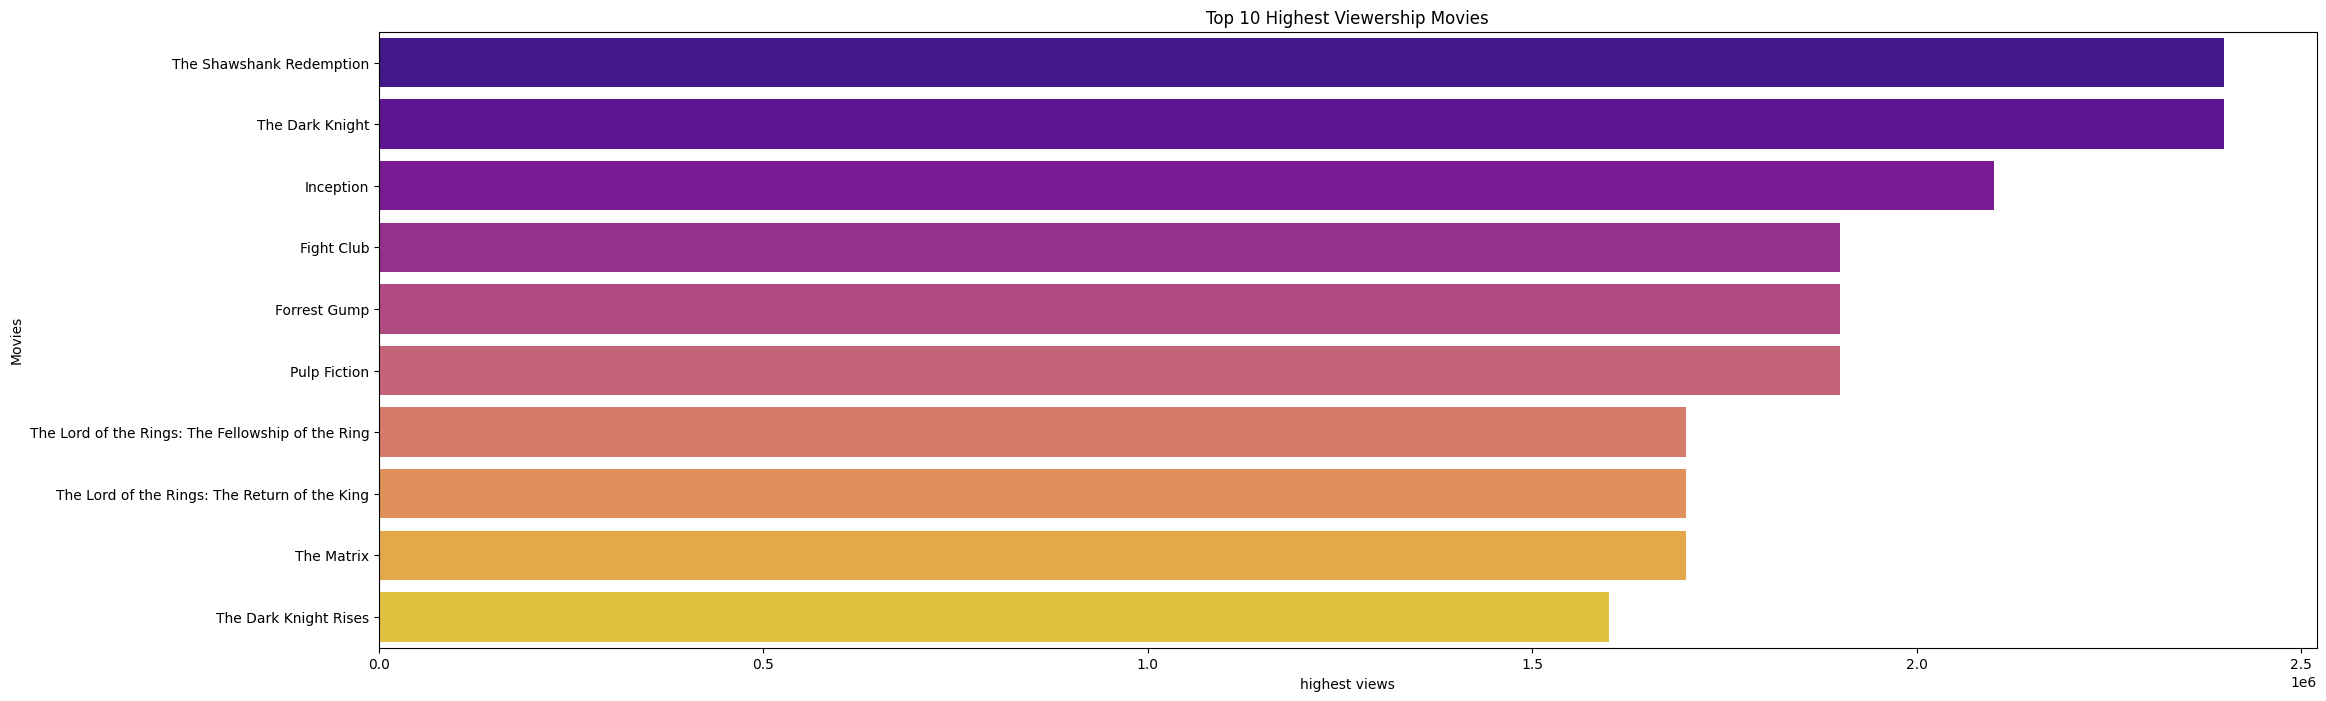

In [35]:
plt.figure(figsize=(25,8))
sns.barplot(y='name',x='votes',data=df2.sort_values(by='votes',ascending=False).head(10),palette='plasma')
plt.ylabel('Movies')
plt.xlabel('highest views')
plt.title('Top 10 Highest Viewership Movies')

 The result likes i guessed

Text(0.5, 1.0, 'Top 10 Directors In Movie Industry')

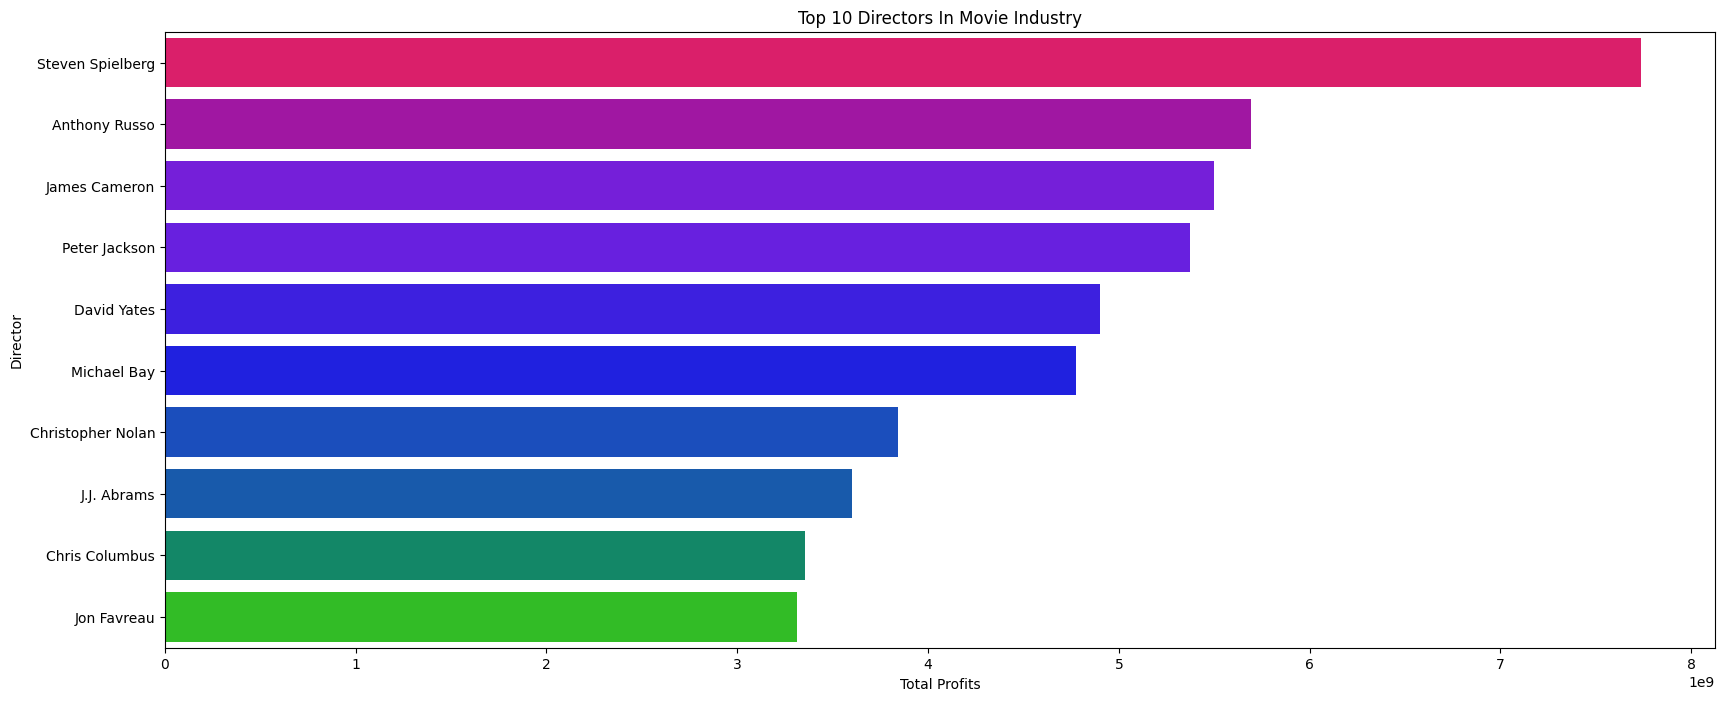

In [37]:
data = df2.groupby('director')['profit'].sum().reset_index().rename(columns={'profit':'total_profit'}).sort_values(by='total_profit',ascending=False)[:10]
plt.figure(figsize=(20,8))
sns.barplot(y='director',x='total_profit',data=data,palette='prism')
plt.ylabel('Director')
plt.xlabel('Total Profits')
plt.title('Top 10 Directors In Movie Industry')

Steven Spielberg dominate other directors in term of havesting profits

Text(0.5, 1.0, 'List Of Genres Have The highest Viewership')

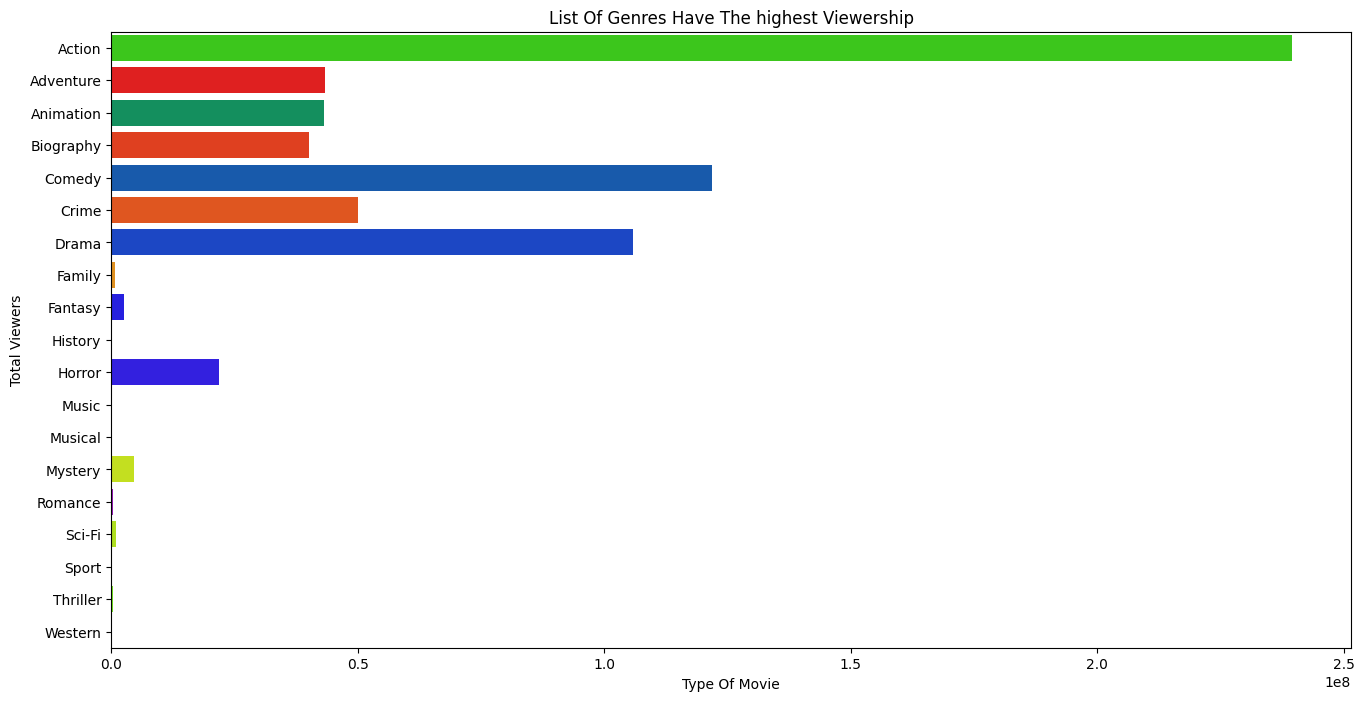

In [39]:
data = df2.groupby('genre')['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'total_views'})
plt.figure(figsize=(16,8))
sns.barplot(x='total_views',y='genre',data=data,palette='prism')
plt.xlabel('Type Of Movie')
plt.ylabel('Total Viewers')
plt.title('List Of Genres Have The highest Viewership')

Sure,Action, comedy, and drama are some of the most popular genres in the movie industry with the dominance of action films due to these unique experience 

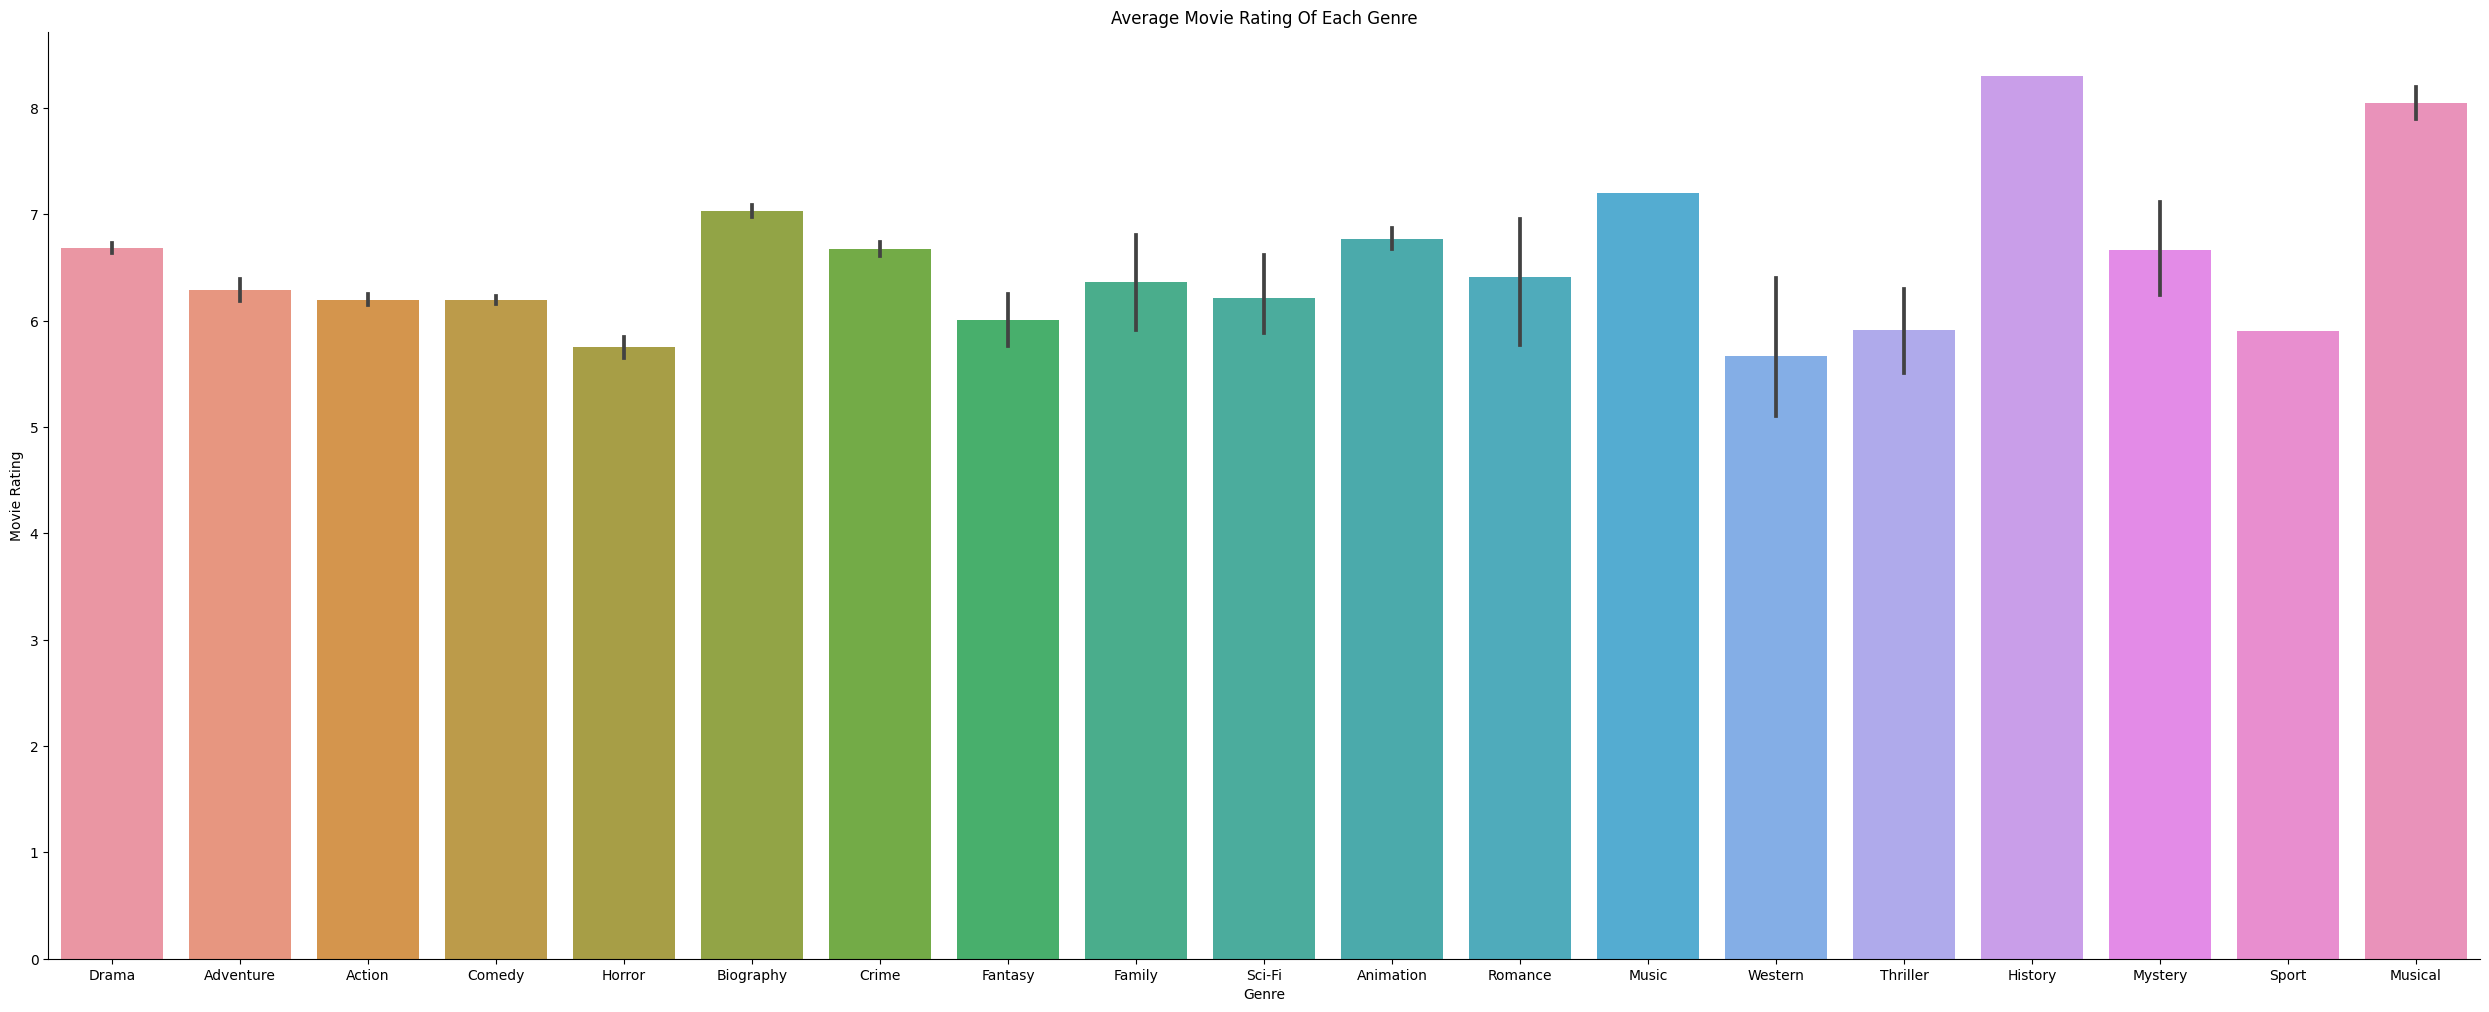

In [41]:
sns.catplot(x='genre', y='score', kind='bar', data=df2, height=10, aspect=2.5)
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.title('Average Movie Rating Of Each Genre')
plt.show()

 Wow,it seems that people are really respect history and biography ( it is unlike a director said :)))
 Music is also a high rated genre (maybe it is because music films often bring chilling and inspiring time )

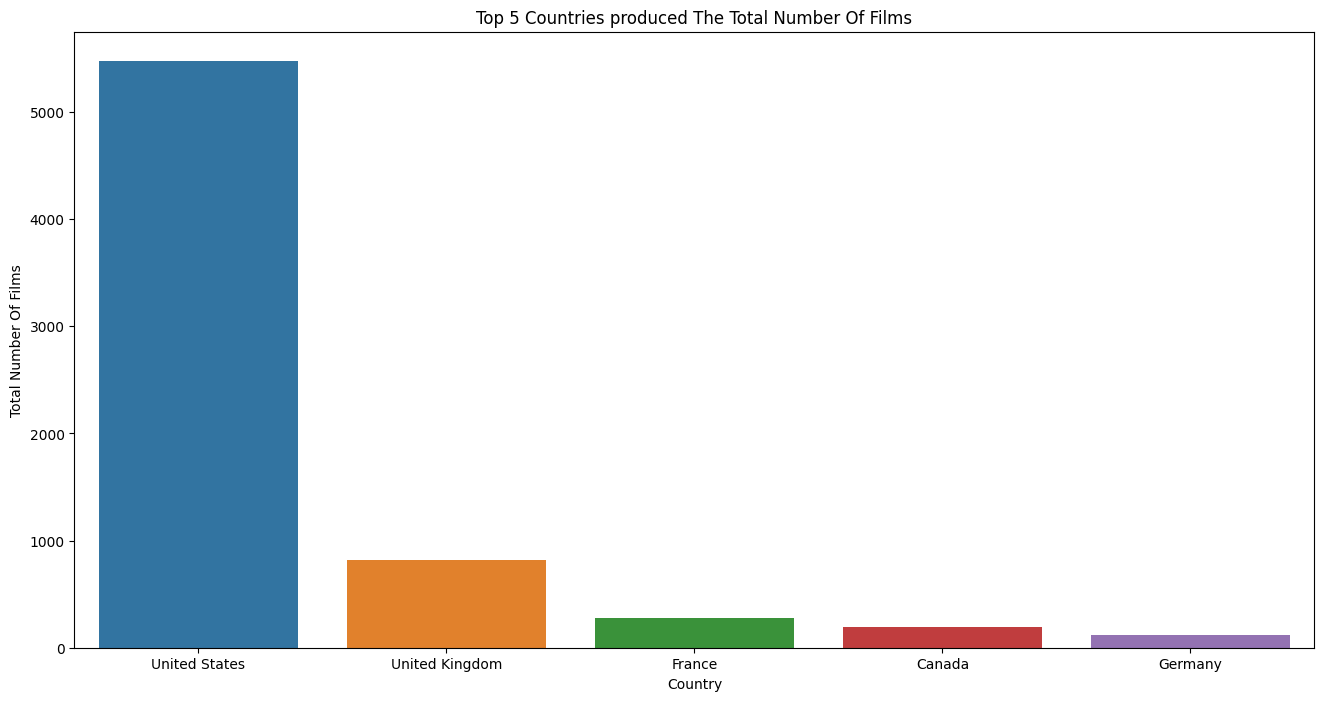

In [43]:
data = df2.groupby('country')['name'].agg({'count'}).reset_index().rename(columns={'count':'total_number_of_films'}).sort_values(by='total_number_of_films',ascending = False)[:5]
plt.figure(figsize=(16,8))
sns.barplot(x='country',y='total_number_of_films',data=data)
plt.xlabel('Country')
plt.ylabel('Total Number Of Films')
plt.title('Top 5 Countries produced The Total Number Of Films')
plt.show()

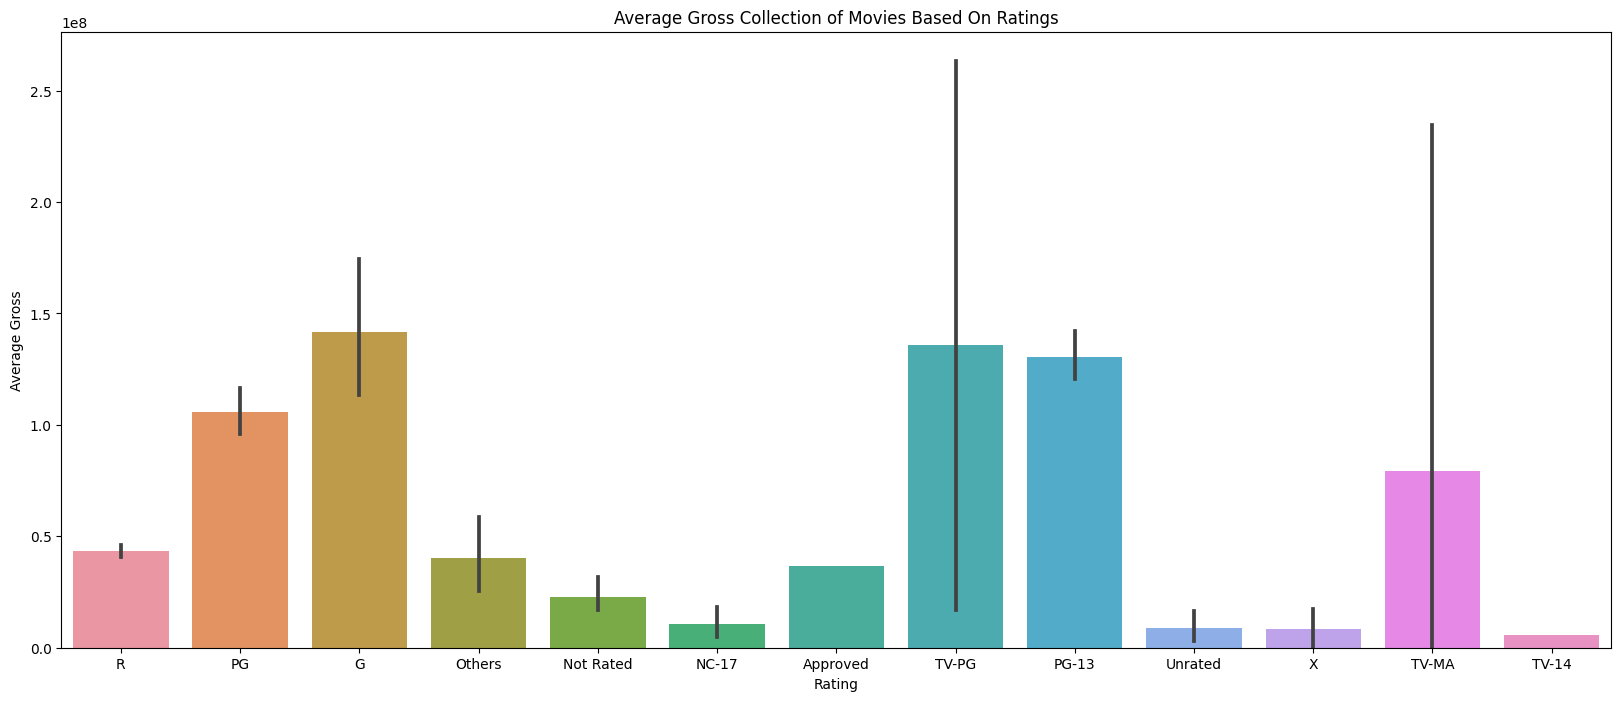

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='rating',y='gross',data=df2)
plt.xlabel('Rating')
plt.ylabel('Average Gross')
plt.title('Average Gross Collection of Movies Based On Ratings')
plt.show()

It is true that film rating affect significantly to gross earning due to the dominance of gross earnings from films for under 13 kids 

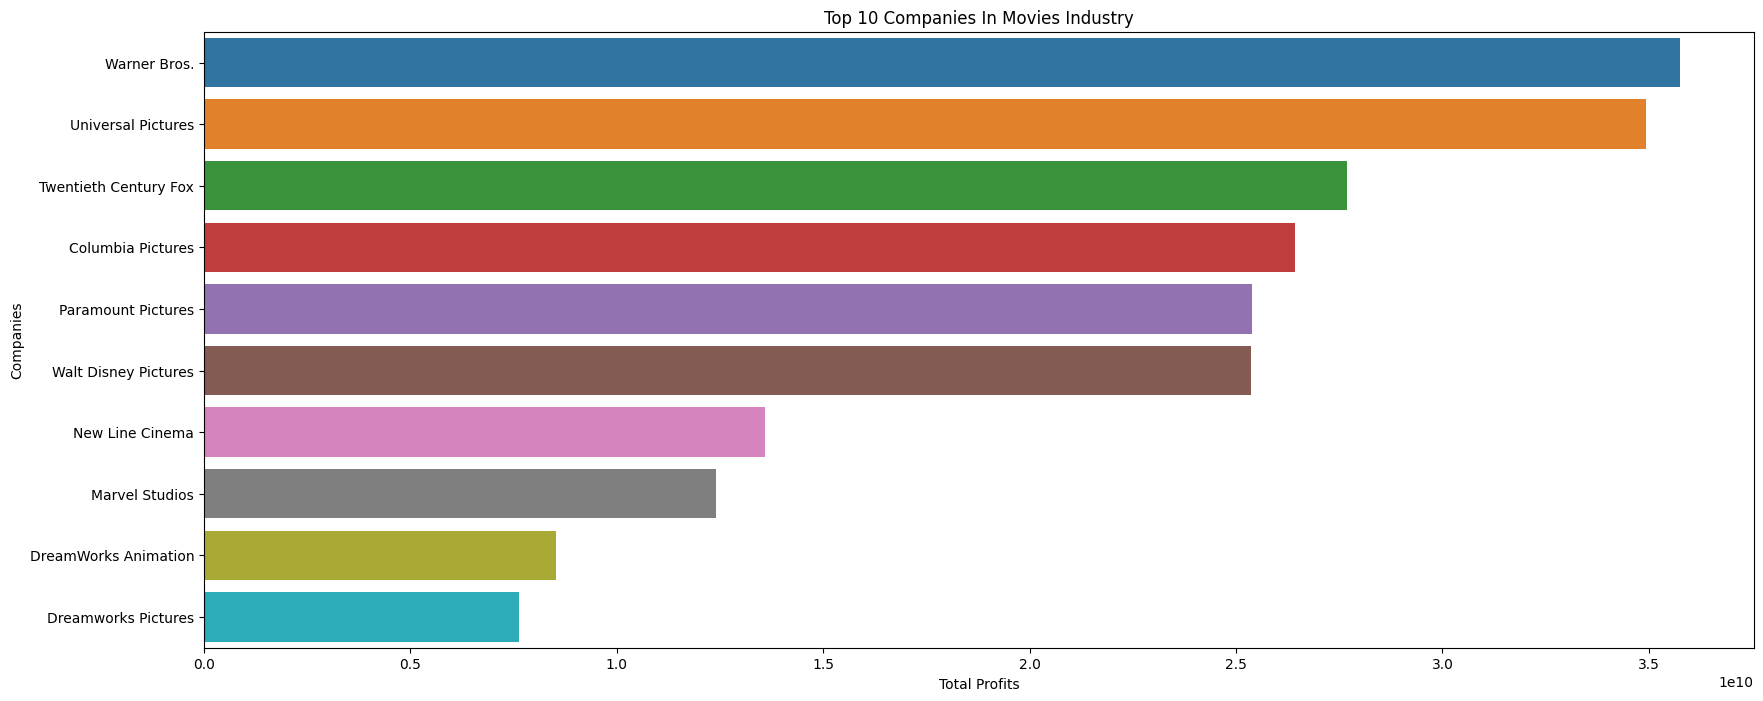

In [46]:
data = df2.groupby(['company'])['profit'].agg({'sum'}).reset_index().rename(columns={'sum':'total_profit'}).sort_values('total_profit',ascending =False)[:10]
plt.figure(figsize=(20,8))
sns.barplot(y='company',x='total_profit',data=data)
plt.ylabel('Companies')
plt.xlabel('Total Profits')
plt.title('Top 10 Companies In Movies Industry')
plt.show()

-Warner Brothers has long been known for their commitment to diversity and inclusion in their films with many well-known ones such as Harry Porter and the whole DC comic
-Marvel studios has 2 top highest grossing movies but they are only focus on superheroes film (which cost exhobitantly)--> low profit is inevitable

In [48]:
#Take a look in corr

In [49]:
df2.corr()

,year,score,votes,budget,gross,runtime,profit
year,1.00,0.09,0.22,0.27,0.25,0.12,0.23
score,0.09,1.00,0.41,0.07,0.18,0.39,0.19
votes,0.22,0.41,1.00,0.42,0.63,0.31,0.63
budget,0.27,0.07,0.42,1.00,0.71,0.26,0.58
gross,0.25,0.18,0.63,0.71,1.00,0.24,0.98
runtime,0.12,0.39,0.31,0.26,0.24,1.00,0.21
profit,0.23,0.19,0.63,0.58,0.98,0.21,1.00


Text(0.5, 1.0, 'Correlation of Numeric Features')

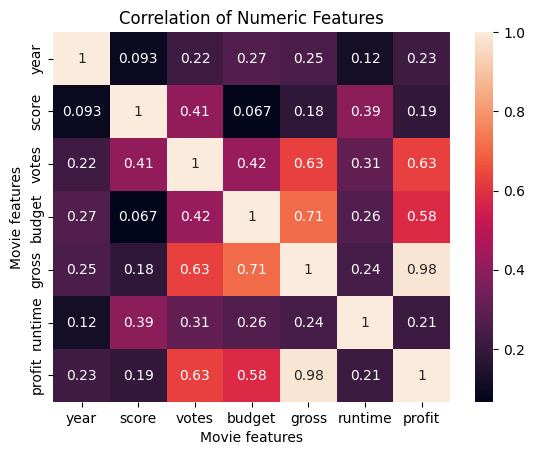

In [56]:
sns.heatmap(df2.corr(),annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.title('Correlation of Numeric Features')

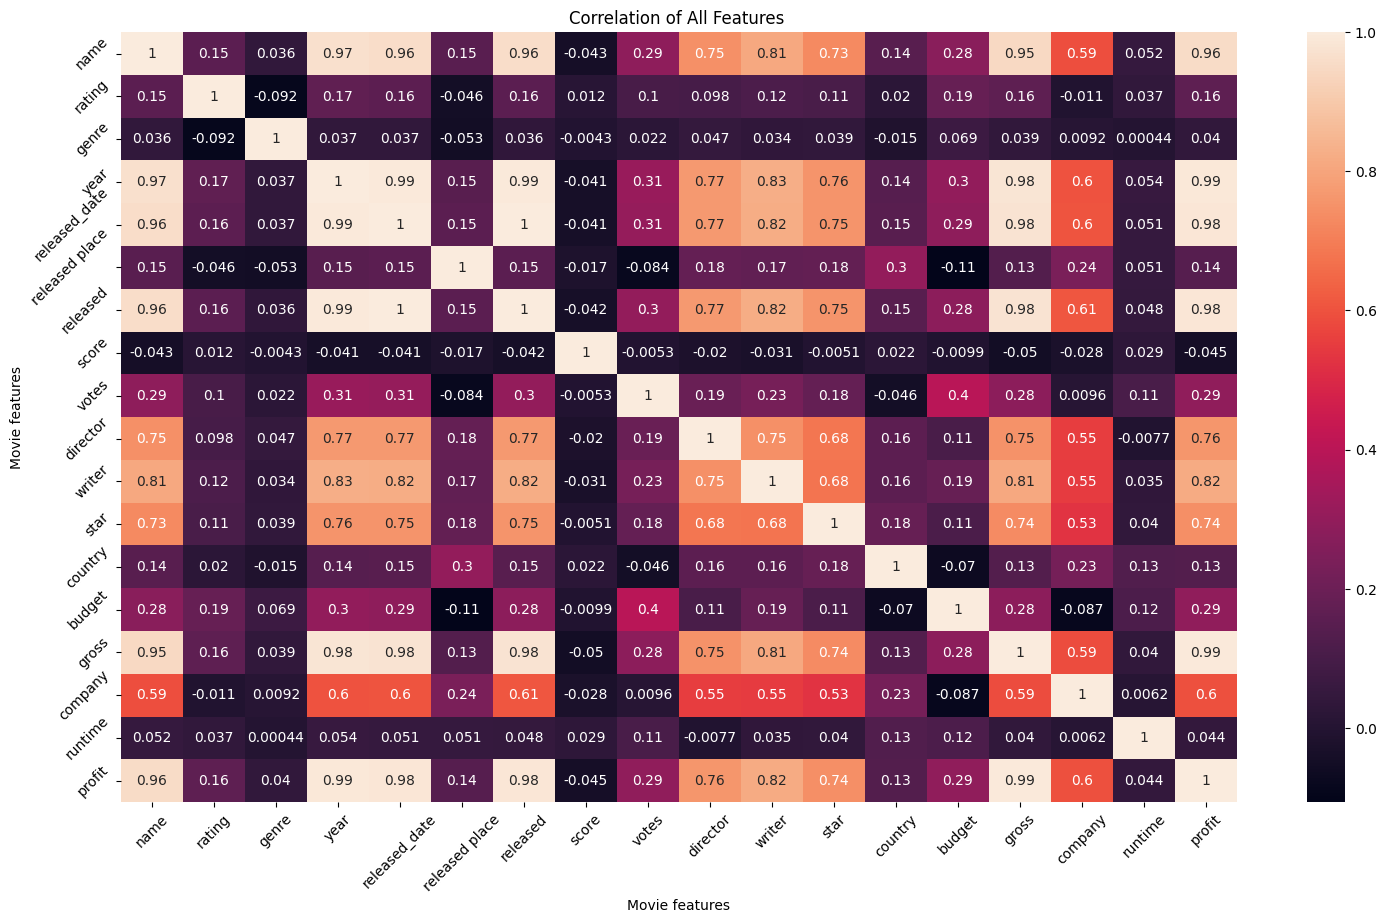

In [58]:
plt.figure(figsize=(18,10))
sns.heatmap(df2.apply(lambda x: x.factorize()[0]).corr(),annot=True)
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation of All Features ')
plt.show()

it is true that higher budget films have a greater chance of making a larger profit.

higher budget means higher votes :it is because there will be more resource available for marketing,production values,higher-quality actors and directors

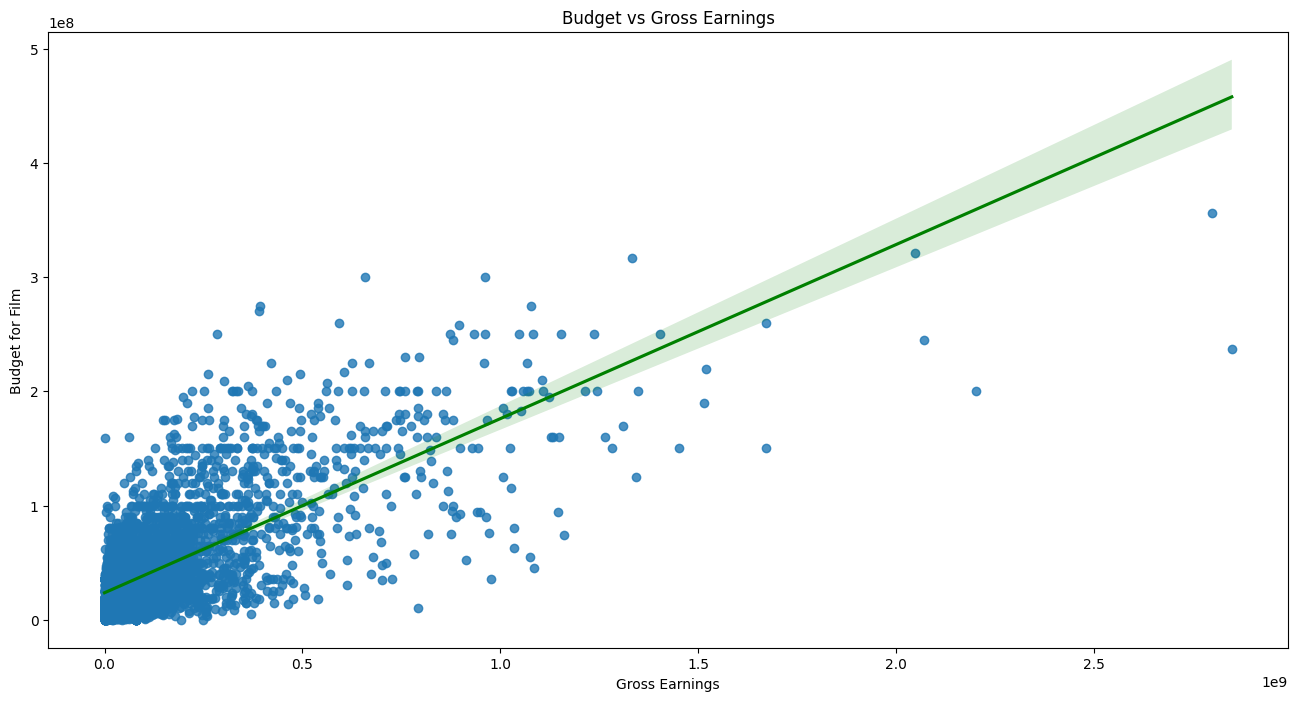

In [64]:
plt.figure(figsize=(16,8))
sns.regplot(x="gross", y="budget", data=df2,line_kws={'color':'green'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

higer budget --> higher earnings 

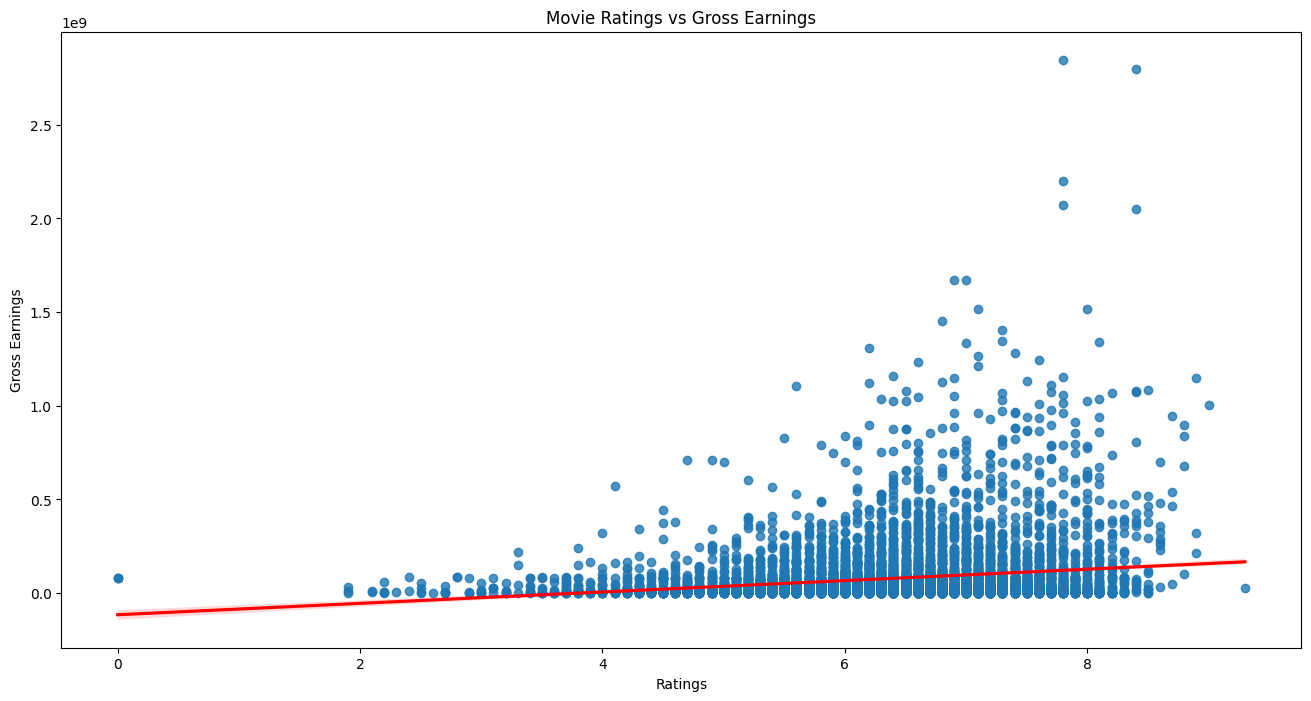

In [66]:
plt.figure(figsize=(16,8))
sns.regplot(x="score", y="gross", data=df2,line_kws={'color':'red'})
plt.title('Movie Ratings vs Gross Earnings')
plt.xlabel('Ratings')
plt.ylabel('Gross Earnings')
plt.show()


highly rated movies cannot completely grab audiences attention (although some of them have impresive earnings)
it is because they tend to focus on conveying meaningful messages,which many viewers are not interest in

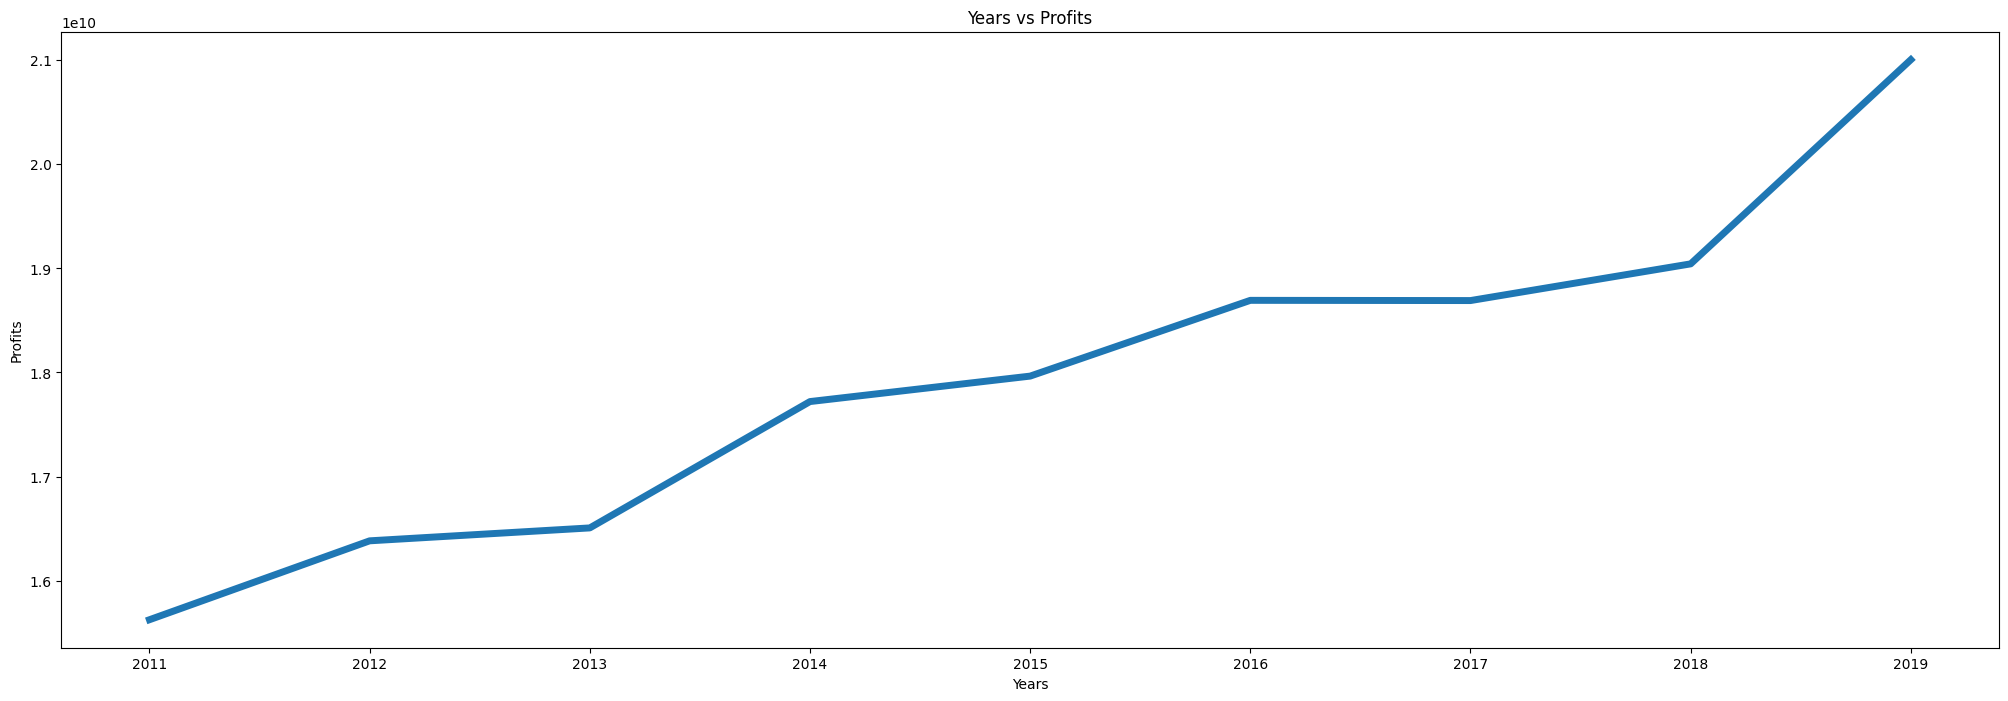

In [84]:
data =df2.groupby(['year'])[['profit']].sum().reset_index()[-10:-1]
plt.figure(figsize=(25,8))
sns.lineplot(x=data['year'], y=data['profit'],linewidth=5)
plt.title('Years vs Profits')
plt.xlabel('Years')
plt.ylabel('Profits')
plt.show()